In [1]:
# For regression models we use cement dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


In [9]:
# importing the dataset
df  = pd.read_excel("data/Concrete_Data.xls")
df.columns = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength']
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [12]:
# since all the columns are numeric we can directly check for null values, duplicate values and get basic statistics
df.info()
df.isnull().sum()
df.duplicated().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [13]:
# remove the duplicated data
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

<Axes: >

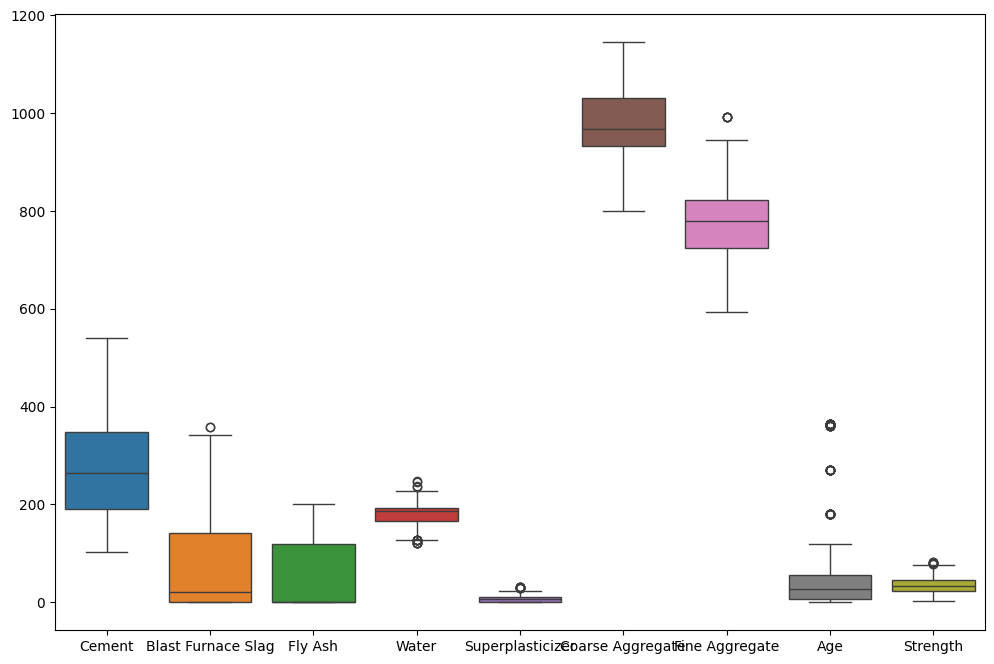

In [14]:
# find any outliers using boxplot
plt.figure(figsize=(12,8))
sns.boxplot(data=df)

<Axes: >

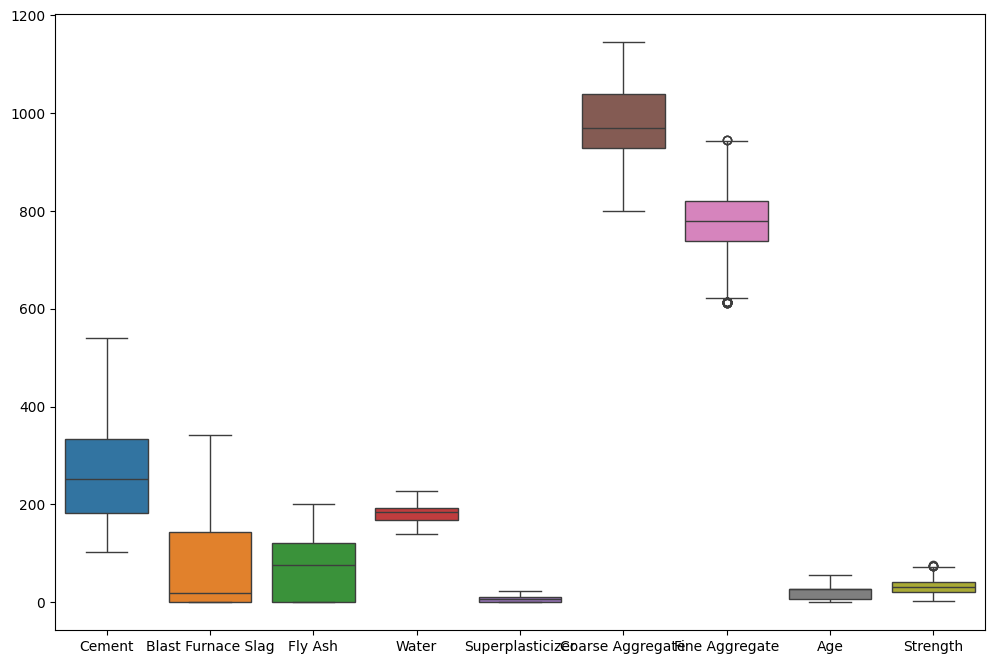

In [16]:
# removing the outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
# plot after removing outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=df)


In [17]:
# splitting the data into features and target variable
X = df.drop('Strength', axis=1)
y = df['Strength']
# splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
# using different regression models and evaluating their performance
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)


In [19]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)

In [20]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [21]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

In [22]:
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)


In [23]:
# evaulating the models 
models = {
    'Linear Regression': y_pred_linear,
    'Decision Tree': y_pred_tree,
    'KNN': y_pred_knn,
    'SVR': y_pred_svr,
    'Random Forest': y_pred_rf
}
for name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse:.2f}, R2 Score: {r2:.2f}")

Linear Regression - MSE: 46.85, R2 Score: 0.80
Decision Tree - MSE: 33.30, R2 Score: 0.86
KNN - MSE: 55.79, R2 Score: 0.76
SVR - MSE: 79.59, R2 Score: 0.66
Random Forest - MSE: 26.13, R2 Score: 0.89


In [ ]:
# conculusion 
# from the evaluation metrics, we can see that Random Forest and Decision Tree models perform the best on this dataset with the highest R2 scores and lowest MSE values.
#  Linear Regression also performs reasonably well, while KNN and SVR show comparatively lower performance.